In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from scipy.spatial import ConvexHull, Delaunay


from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment, InkLibrary
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.cubemap import CubeMap
from chromalab.printer import Printer

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [3]:
wavelengths = np.arange(390, 700, 10)
d65 = Illuminant.get("E")

trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
LMS_to_RGB = maxbasis_tri.get_cone_to_maxbasis_transform()[::-1]

tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)
tetra_maxbasis = maxbasis.get_max_basis_observer()

100%|██████████| 28/28 [00:00<00:00, 1085.36it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")
100%|██████████| 28/28 [00:00<00:00, 49.68it/s]


In [4]:
# Max Contrast Hypercube Point Cloud
# stepsize = 0.05
# values = np.arange(0, 1 + stepsize, stepsize)/ np.linalg.norm([1, 1, 1, 1])
# total_combinations = len(values) ** 4
# LMSQ_gamut = product(values, repeat=4)
# enumerate_pc = np.array(list(LMSQ_gamut))

# # Convert to RGB
# enumerate_rgbs = np.clip((LMS_to_RGB@(enumerate_pc[:, [0, 1, 3]].T)).T, 0, 1)

# hull = Delaunay(point_cloud)
# def in_hull(p, hull):
#     """
#     Test if points in `p` are in `hull`

#     `p` should be a `NxK` coordinates of `N` points in `K` dimensions
#     `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
#     coordinates of `M` points in `K`dimensions for which Delaunay triangulation
#     will be computed
#     """
#     from scipy.spatial import Delaunay
#     if not isinstance(hull,Delaunay):
#         hull = Delaunay(hull)

#     return hull.find_simplex(p)>=0
# results = in_hull(enumerate_pc, hull)

In [111]:
point_cloud, rgbs = tetrachromat.get_enumeration_of_solid(0.1)

 50%|████▉     | 4455/8990 [00:08<00:08, 508.83it/s]

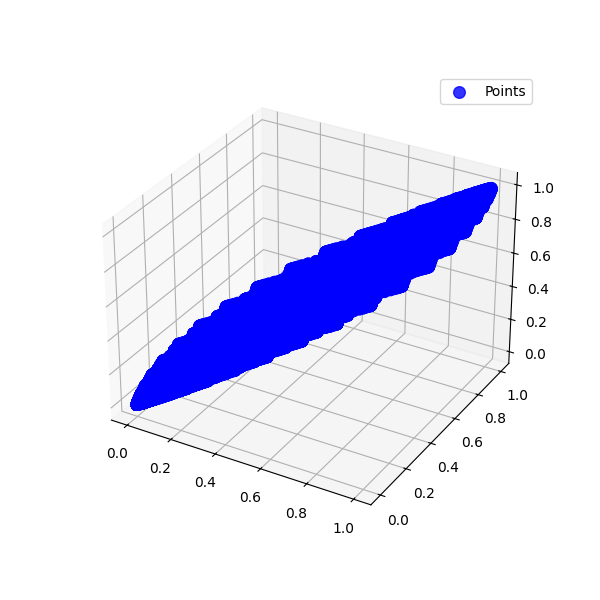

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 1], point_cloud[:, 2], point_cloud[:, 3], s=70, c='blue', alpha=0.8, label='Points')
ax.legend()
plt.show()

In [107]:
cubemap = CubeMap(point_cloud, maxbasis, rgbs=rgbs, verbose=True)
cubemap.display_cubemap_Q_orientation(0.8, 0.4, 5)